In [1]:
from HamOp import *
from Circ import *
from SbE import *

import scipy.linalg as ln

import matplotlib
import matplotlib.pyplot as plt

from math import *

#### Funzione di supporto per la stampa dei parametri di output

In [2]:
def print_info_group(groups: list[SparsePauliOp]):
#   Funzione che passata una lista di SparsePauliOp stampa 
#   le informazini principali di questa

#   Recuperiamo il numero di gruppi di operatori
    n = len(groups)

#   Stampiamo quanti gruppi sono stati creati
    print(f"Numero Gruppi: ", n)

#   Cicliamo su tutti i gruppi
    for i in range(0, n):
#       Recuperiamo il valore massimo dei pesi del gruppo
        peso_max = max(abs(groups[i].coeffs))

#       Recuperiamo il valore minimo dei pesi del gruppo
        peso_min = min(abs(groups[i].coeffs))

#       Stampiamo massimo e minimo peso per ogni elemento del gruppo
        print(f"Gruppo: ", i+1,"\tPeso Massimo: ", peso_max, "\tPeso Minimo: ", peso_min)

#### Parametri sistema di cui calcolare Hamiltoniana e relative potenze

In [3]:
# Numero spin anello
n_spin = 12

# Periodicià anello
chiuso = True

# Potenza massima da calcolare e di cui fare il grouping
pow_max = 5

#### Creazione Hamiltoniana

In [4]:
# Hamiltoniana sistema
ham = crea_hamiltonianaOp(n_spin, chiuso)

#### Grouping di $\mathcal{H}$

In [5]:
# Raggruppiamo i termini dell'Hamiltoniana che commutano tra di loro
group = ham.tot.group_commuting()

# Stampiamo le info di ognuno dei gruppi
print_info_group(group)

Numero Gruppi:  3
Gruppo:  1 	Peso Massimo:  0.25 	Peso Minimo:  0.25
Gruppo:  2 	Peso Massimo:  0.25 	Peso Minimo:  0.25
Gruppo:  3 	Peso Massimo:  0.25 	Peso Minimo:  0.25


#### Grouping di $\mathcal{H}^2$

IIIIIIIIIIII
Numero Gruppi:  20
Gruppo:  1 	Peso Massimo:  2.25 	Peso Minimo:  0.125
Gruppo:  2 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  3 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  4 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  5 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  6 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  7 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  8 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  9 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  10 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  11 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  12 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  13 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  14 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  15 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  16 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  17 	Peso Massimo:  0.125 	Peso Minimo:  0.125
Gruppo:  18 	Peso Massimo:  0.125 	Peso Min

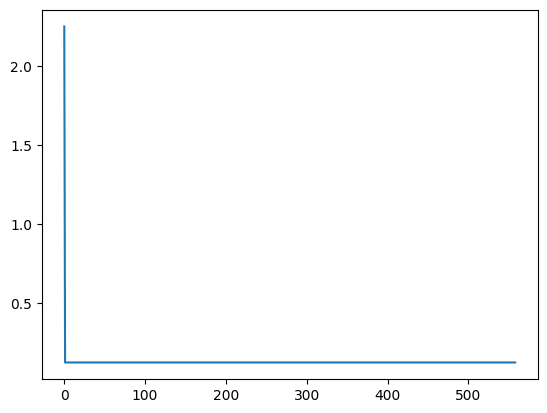

In [6]:
# Calcoliamo H^2
H2 = (ham.tot @ ham.tot).simplify()

# Ordiniamo i termini di H2 in funzione dei pesi relativi
ord = H2.argsort(weight=True)

# Plottimo i pesi dei vari termini
plt.plot(abs(H2.coeffs[ord]))
print(H2.paulis[ord[0]])

# Raggruppiamo i termini di H^2 che commutano fra di loro
group = H2.group_commuting()

# Stampiamo le info di ognuno dei gruppi
print_info_group(group)
print(group)

#### Grouping di $\mathcal{H}^3$

IIIIIIIIIIII
Numero Gruppi:  91
Gruppo:  1 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  2 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  3 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  4 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  5 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  6 	Peso Massimo:  0.1875 	Peso Minimo:  0.03125
Gruppo:  7 	Peso Massimo:  1.53125 	Peso Minimo:  0.0625
Gruppo:  8 	Peso Massimo:  0.1875 	Peso Minimo:  0.03125
Gruppo:  9 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  10 	Peso Massimo:  0.1875 	Peso Minimo:  0.09375
Gruppo:  11 	Peso Massimo:  0.1875 	Peso Minimo:  0.03125
Gruppo:  12 	Peso Massimo:  1.53125 	Peso Minimo:  0.03125
Gruppo:  13 	Peso Massimo:  0.1875 	Peso Minimo:  0.09375
Gruppo:  14 	Peso Massimo:  0.1875 	Peso Minimo:  0.09375
Gruppo:  15 	Peso Massimo:  0.1875 	Peso Minimo:  0.03125
Gruppo:  16 	Peso Massimo:  0.1875 	Peso Minimo:  0.03125
Gruppo:  17 	Peso Massimo:  0.1875 	Peso M

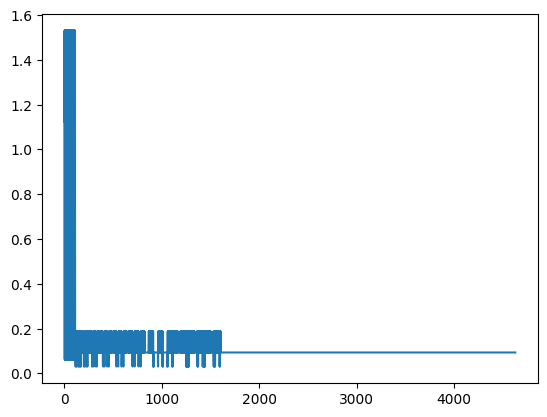

In [7]:
# Calcoliamo H^2
H3 = (H2 @ ham.tot).simplify()

# Ordiniamo i termini di H2 in funzione dei pesi relativi
ord = H3.argsort(weight=True)

# Plottimo i pesi dei vari termini
plt.plot(abs(H3.coeffs[ord]))
print(H3.paulis[ord[0]])

# Raggruppiamo i termini di H^2 che commutano fra di loro
group = H3.group_commuting()

# Stampiamo le info di ognuno dei gruppi
print_info_group(group)

#### Grouping di $\mathcal{H}^4$

In [ ]:
# Calcoliamo H^2
H4 = (H3 @ ham.tot).simplify()

# Ordiniamo i termini di H2 in funzione dei pesi relativi
ord = H4.argsort(weight=True)

# Plottimo i pesi dei vari termini
plt.plot(abs(H4.coeffs[ord]))
print(H4.paulis[ord[0]])

# Raggruppiamo i termini di H^2 che commutano fra di loro
group = H4.group_commuting()

# Stampiamo le info di ognuno dei gruppi
print_info_group(group)

IIIIIIIIIIII


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x79e3cc626f20>>
Traceback (most recent call last):
  File "/home/mez/venv/qiskit_1.0.2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


#### Grouping di $\mathcal{H}^5$

In [ ]:
# Calcoliamo H^2
H5 = (H4 @ ham.tot).simplify()

# Ordiniamo i termini di H2 in funzione dei pesi relativi
ord = H5.argsort(weight=True)

# Plottimo i pesi dei vari termini
plt.plot(abs(H5.coeffs[ord]))
print(H5.paulis[ord[0]])

# Raggruppiamo i termini di H^2 che commutano fra di loro
group = H5.group_commuting()

# Stampiamo le info di ognuno dei gruppi
print_info_group(group)

: 